In [1]:
import matplotlib.pyplot as plt
import pandas as pd

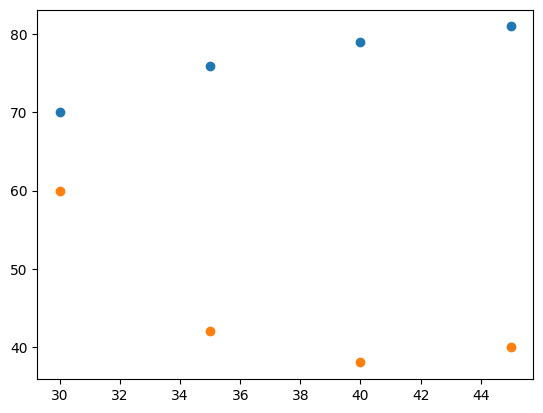

In [11]:
data = pd.read_csv("table.csv")
plt.scatter(data.I_rot, data.I_tr_collapse)
plt.scatter(data.I_rot, data.I_tr_ellipse)